<a href="https://colab.research.google.com/github/muajnstu/DSK-Chain-to-predict-diabeties-/blob/main/Visualaization_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RPI Score

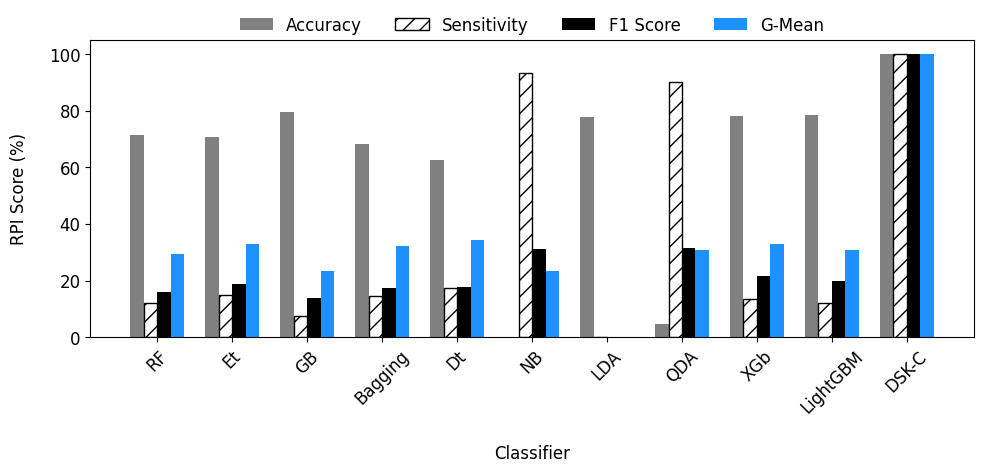

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 12,          # font size for all text
    'axes.titlesize': 12,     # axes title
    'axes.labelsize': 12,     # x and y labels
    'xtick.labelsize': 12,    # x tick labels
    'ytick.labelsize': 12,    # y tick labels
    'legend.fontsize': 12
})

# Data
data = {
    'Classifier': ['RF', 'Et', 'GB', 'Bagging', 'Dt', 'NB', 'LDA', 'QDA', 'XGb', 'LightGBM', 'DSK-C'],
    'Accuracy': [0.7666, 0.7605, 0.8268, 0.7440, 0.7026, 0.2395, 0.8125, 0.2741, 0.8163, 0.8200, 0.9782],
    'Sensitivity': [0.1220, 0.1504, 0.0772, 0.1463, 0.1748, 0.9228, 0.0041, 0.8902, 0.1382, 0.1220, 0.9891],
    'F1 Score': [0.1622, 0.1888, 0.1418, 0.1748, 0.1788, 0.3101, 0.0080, 0.3124, 0.2179, 0.2007, 0.9781],
    'G-Mean': [0.3337, 0.3678, 0.2775, 0.3588, 0.3792, 0.2786, 0.0636, 0.3454, 0.3662, 0.3455, 0.9837]
}


df = pd.DataFrame(data)

def compute_rpi(series):
    return (series - series.min()) / (series.max() - series.min()) * 100

metrics = ['Accuracy', 'Sensitivity', 'F1 Score', 'G-Mean']
for metric in metrics:
    df[f'RPI_{metric}'] = compute_rpi(df[metric])

bar_width = 0.18
x = np.arange(len(df['Classifier']))

plt.figure(figsize=(10,5))  # keep figure proportional to LaTeX column width
plt.bar(x - 1.5*bar_width, df['RPI_Accuracy'], width=bar_width, color='grey', label='Accuracy')
plt.bar(x - 0.5*bar_width, df['RPI_Sensitivity'], width=bar_width, color='white', edgecolor='black', hatch='//', label='Sensitivity')
plt.bar(x + 0.5*bar_width, df['RPI_F1 Score'], width=bar_width, color='black', label='F1 Score')
plt.bar(x + 1.5*bar_width, df['RPI_G-Mean'], width=bar_width, color='dodgerblue', label='G-Mean')

plt.xlabel('Classifier', labelpad=20)  # Increase labelpad to move further down
plt.ylabel('RPI Score (%)', labelpad=15)

plt.xticks(x, df['Classifier'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=5, frameon=False)
plt.tight_layout()

plt.savefig("Fig03-2025051018.pdf", format="pdf", dpi=800, bbox_inches="tight")
plt.show()

In [ ]:
print("RPI Scores for each model:")
print(df[['Model Name'] + [col for col in df.columns if col.startswith('RPI_')]].to_string(index=False))


RPI Scores for each model:
    Model Name  RPI_Accuracy  RPI_Sensitivity  RPI_F1 Score  RPI_G-Mean    RPI_AUC
           KNN      39.84375         39.84375     39.097744   40.298507  39.473684
   DistanceKNN      51.56250         51.56250     50.375940   52.238806  39.473684
GeneralizedKNN      52.34375         52.34375     51.879699   52.238806  47.368421
  EuclideanKNN      39.84375         39.84375     39.097744   40.298507  39.473684
  ManhattanKNN       9.37500          9.37500      3.759398   10.447761   0.000000
  ChebyshevKNN       0.00000          0.00000      0.000000    0.000000  10.526316
MahalanobisKNN      98.43750         98.43750     98.496241   98.507463  94.736842
 SeuclideanKNN     100.00000        100.00000    100.000000  100.000000 100.000000
 WminkowskiKNN      52.34375         52.34375     51.879699   52.238806  47.368421


Line Graph for Average Performance Comparison

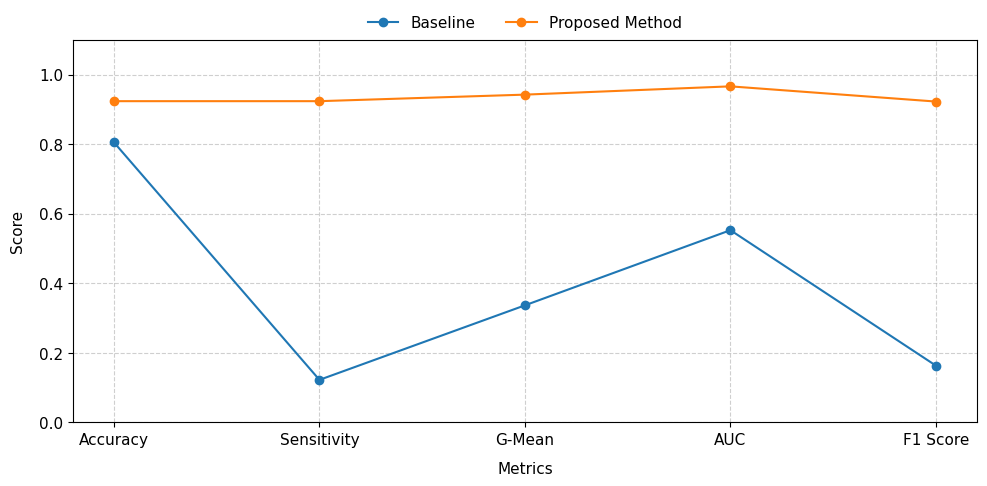

In [ ]:
plt.rcParams.update({
    'font.size': 11,
    'axes.labelsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 11
})

# Metrics and their corresponding averages
metrics = ['Accuracy', 'Sensitivity', 'G-Mean', 'AUC', 'F1 Score']
baseline_avg = [0.7292, 0.1988, 0.1792, 0.3222, 0.5834]
proposed_avg = [0.9237, 0.9237, 0.9425, 0.9663, 0.9226]

# --- Plot ---
plt.figure(figsize=(10,5))  # suitable for one-column LaTeX figure
plt.plot(metrics, baseline_avg, marker='o', markersize=6, linewidth=1.5, label='Baseline')
plt.plot(metrics, proposed_avg, marker='o', markersize=6, linewidth=1.5, label='Proposed Method')

plt.xlabel('Metrics', labelpad=10)
plt.ylabel('Score', labelpad=10)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=2, frameon=False)
plt.tight_layout()
plt.show()


Spider Plot

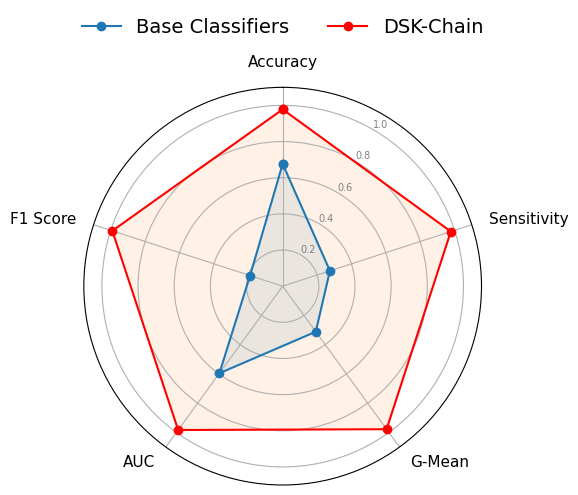

In [7]:
plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

metrics = ['Accuracy', 'Sensitivity', 'G-Mean', 'AUC', 'F1 Score']
baseline_avg = [0.6763, 0.2748, 0.3116, 0.5955, 0.1896]
dskc_result = [0.9782, 0.9782, 0.9781, 0.9837, 0.9909]


labels = np.array(metrics)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

baseline = baseline_avg + baseline_avg[:1]
proposed = dskc_result + dskc_result[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# --- Move labels ---
ax.set_rlabel_position(30)

plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ['0.2', '0.4', '0.6', '0.8', '1.0'], color="gray", size=7)
plt.ylim(0, 1.1)

ax.plot(angles, baseline, linewidth=1.5, linestyle='solid', marker='o', label='Base Classifiers')
ax.fill(angles, baseline, alpha=0.1)
ax.plot(angles, proposed, linewidth=1.5, linestyle='solid', marker='o', label='DSK-Chain', color='red')
ax.fill(angles, proposed, alpha=0.1)

# --- Axis Labels Outside the Circle ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels([])

# --- Manually position the labels ---
for i, label in enumerate(labels):
    angle_rad = angles[i]
    if angle_rad == 0:
        ha = 'center'
        va = 'bottom'
    elif 0 < angle_rad < np.pi:
        ha = 'left'
        va = 'center'
    elif angle_rad == np.pi:
        ha = 'center'
        va = 'top'
    else:
        ha = 'right'
        va = 'center'
    ax.text(angle_rad, 1.2, label, size=11, ha=ha, va=va)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.22), ncol=2, frameon=False)

plt.savefig("Fig2.2-2025051018.pdf", format="pdf", dpi=800, bbox_inches="tight")

plt.tight_layout()
plt.show()

Heatmap Graph for Illustrating Performance Improvement

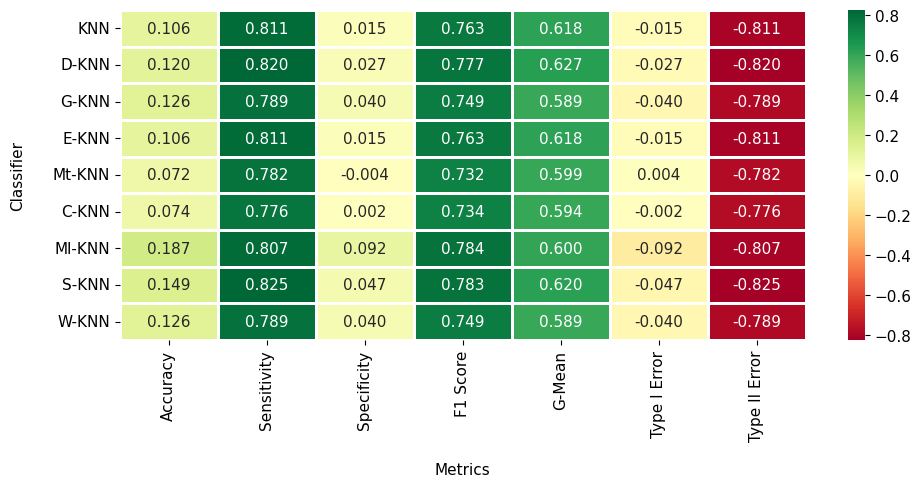

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set font sizes to match the document (10-11pt) ---
plt.rcParams.update({
    'font.size': 11,          # main font size
    'axes.labelsize': 11,     # x/y labels
    'xtick.labelsize': 11,    # tick labels
    'ytick.labelsize': 11,
    'legend.fontsize': 11
})

# --- Data ---
models = ['KNN','D-KNN','G-KNN','E-KNN','Mt-KNN','C-KNN','Ml-KNN','S-KNN','W-KNN']

primary = {
        'Model Name': models,
         'Accuracy': [0.8155, 0.8077, 0.8011, 0.8155, 0.8165, 0.8102, 0.7747, 0.8046, 0.8011],
        'Sensitivity': [0.1104, 0.1081, 0.1374, 0.1104, 0.1059, 0.1081, 0.1554, 0.1284, 0.1374],
        'Specificity': [0.9459, 0.9371, 0.9238, 0.9459, 0.9479, 0.9400, 0.8892, 0.9296, 0.9238],
        'G-Mean': [0.3231, 0.3183, 0.3563, 0.3231, 0.3168, 0.3188, 0.3717, 0.3455, 0.3563],
         'F1 Score': [0.1573, 0.1493, 0.1773, 0.1573, 0.1526, 0.1509, 0.1772, 0.1701, 0.1773],
        'Type I Error': [0.0541, 0.0629, 0.0762, 0.0541, 0.0521, 0.0600, 0.1108, 0.0704, 0.0762],
        'Type II Error': [0.8896, 0.8919, 0.8626, 0.8896, 0.8941, 0.8919, 0.8446, 0.8716, 0.8626]


}

proposed = {
    'Model Name': models,
    'Accuracy': [0.9217, 0.9276, 0.9268, 0.9217, 0.8881, 0.8845, 0.9620, 0.9537, 0.9268],
    'Sensitivity': [0.9217, 0.9276, 0.9268, 0.9217, 0.8881, 0.8845, 0.9620, 0.9537, 0.9268],
    'Specificity': [0.9608, 0.9638, 0.9634, 0.9608, 0.9440, 0.9423, 0.9810, 0.9769, 0.9634],
    'F1 Score': [0.9205, 0.9264, 0.9260, 0.9205, 0.8843, 0.8853, 0.9614, 0.9528, 0.9260],
    'G-Mean': [0.9411, 0.9455, 0.9449, 0.9411, 0.9156, 0.9129, 0.9715, 0.9652, 0.9449],
    'Type I Error': [0.0392, 0.0362, 0.0366, 0.0392, 0.0560, 0.0577, 0.0190, 0.0231, 0.0366],
    'Type II Error': [0.0783, 0.0724, 0.0732, 0.0783, 0.1119, 0.1155, 0.0380, 0.0463, 0.0732]

}

metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'G-Mean', 'Type I Error', 'Type II Error']
df_primary = pd.DataFrame(primary).set_index('Model Name')
df_proposed = pd.DataFrame(proposed).set_index('Model Name')

# --- Calculate differences ---
diff = df_proposed[metrics] - df_primary[metrics]

plt.figure(figsize=(10, 5))  # fits one-column width in LaTeX
sns.heatmap(diff, annot=True, cmap='RdYlGn', center=0, fmt=".3f",
            linewidths=1.0, cbar_kws={"shrink": 1.0})

plt.ylabel('Classifier', labelpad=20)
plt.xlabel('Metrics', labelpad=15)
plt.tight_layout()
plt.show()